In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')
df.drop(columns='Unnamed: 0',inplace=True)


In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [11]:
df.drop(columns=['day', 'month', 'year'],inplace=True)

In [12]:
df['Classes'] = df['Classes  '].str.strip()

In [ ]:
df.drop(columns=['Classes  '],inplace= True)


In [15]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,not fire
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,not fire
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,not fire
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,not fire
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,not fire


In [16]:
df['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [18]:
df['Classes'] = np.select(condlist=[df['Classes'] == 'not fire',df['Classes'] == 'fire'],choicelist=[0,1],default= df['Classes'])
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [19]:
##Feature selection
X = df.drop(columns=['FWI'])
y = df['FWI']
print(y)
X

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,1,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,1,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,1,0


In [20]:
#Train Test Split
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train.shape

(182, 11)

In [24]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549,0.542141
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665,-0.456876
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969,-0.082570
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022,-0.369357
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514,0.781259
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582,0.617273
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838,0.543581
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441,0.742977
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897,0.612239
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000,0.188837


<Axes: >

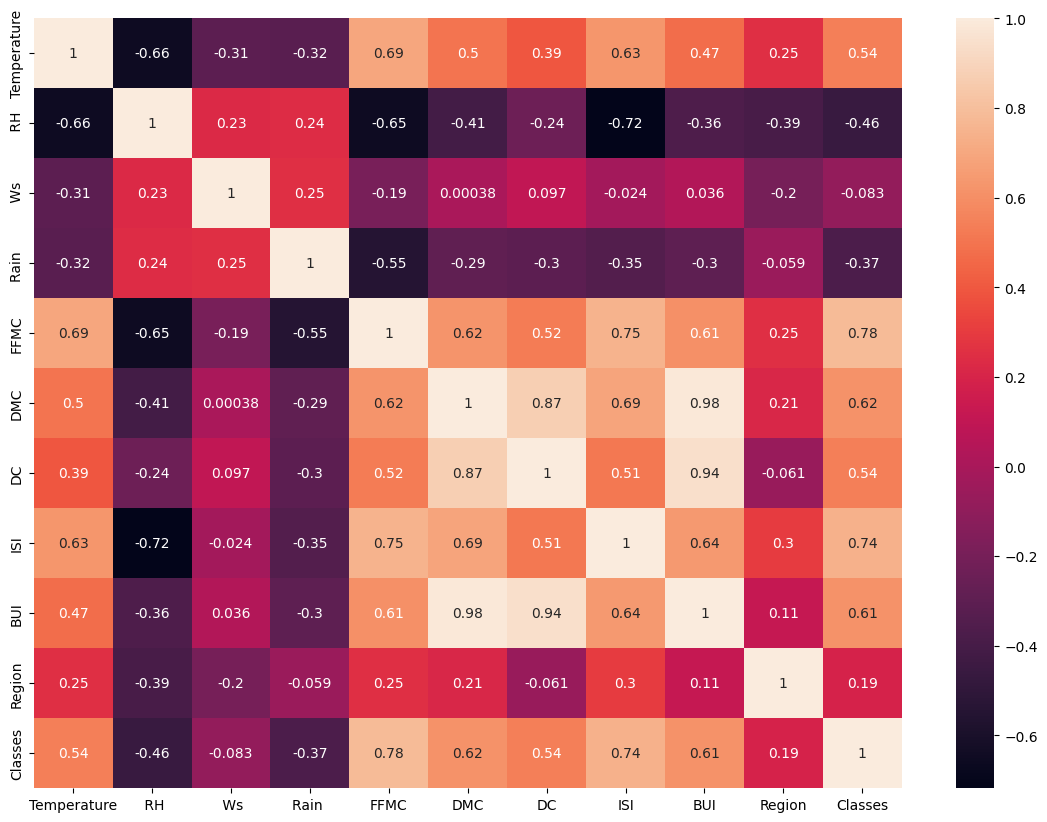

In [25]:
#Checking for multicolinearity
plt.figure(figsize=(14,10))
sns.heatmap(X_train.corr(),annot=True)

In [32]:
corr_matr

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Region,Classes
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.254549,0.542141
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.394665,-0.456876
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.199969,-0.082570
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.059022,-0.369357
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.249514,0.781259
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.212582,0.617273
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,-0.060838,0.543581
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.296441,0.742977
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.114897,0.612239
Region,0.254549,-0.394665,-0.199969,-0.059022,0.249514,0.212582,-0.060838,0.296441,0.114897,1.000000,0.188837


In [35]:
corr_matr = X_train.corr()


np.float64(0.24165583923276368)

In [36]:
corr_matr.iloc[1,0]

np.float64(-0.6560952065209624)

In [38]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i,j])>threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [44]:
#Finding the features  that receed some threshold parameter 
corr_features = correlation(X_train,0.85)
corr_features

{'BUI', 'DC'}

In [46]:
#drop features that are co-related
X_train.drop(columns=corr_features,inplace=True)


In [48]:
##Similary we need to drop from test data also
X_test.drop(columns=corr_features,inplace=True)

In [50]:
X_train

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Region,Classes
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,1,0
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0
...,...,...,...,...,...,...,...,...,...
106,24,82,15,0.4,44.9,0.9,0.2,0,0
14,28,80,17,3.1,49.4,3.0,0.4,0,0
92,25,76,17,7.2,46.0,1.3,0.2,0,0
179,34,59,16,0.0,88.1,19.5,7.4,1,1


## Feature scaling or standardization

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'After scaling')

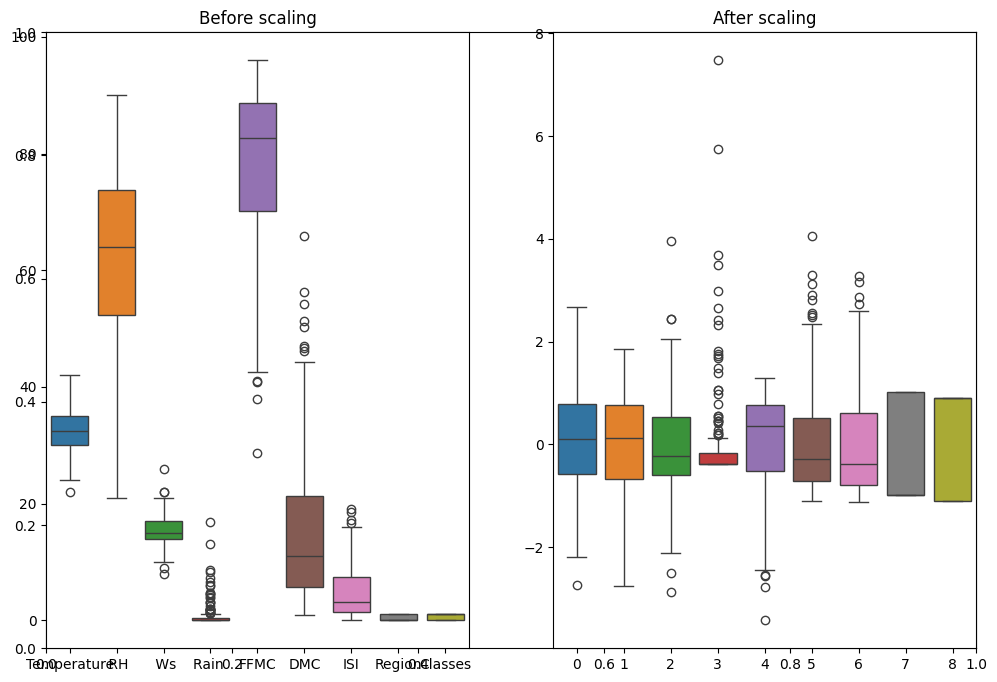

In [54]:
#Box plot to understand outliers and effect of scaling
plt.subplots(figsize = (12,8))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("Before scaling")
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title("After scaling")

## Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()

In [56]:
linReg.fit(X_train_scaled,y_train)

LinearRegression()

In [62]:
y_pred = linReg.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
mae

0.5468236465249976

In [63]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
score

0.9847657384266951

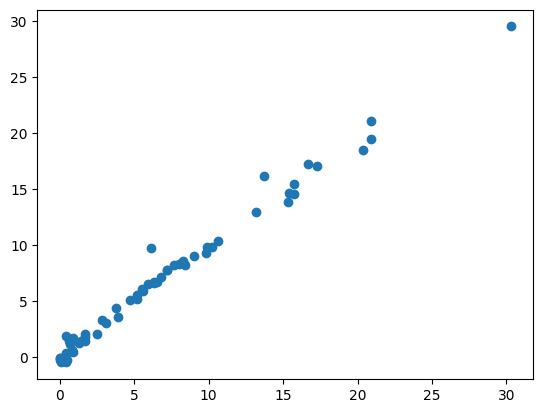

In [64]:
plt.scatter(y_test,y_pred)

### Lasso Regression

Mean Absolute Error: 1.133175994914409
Performance: 0.9492020263112388


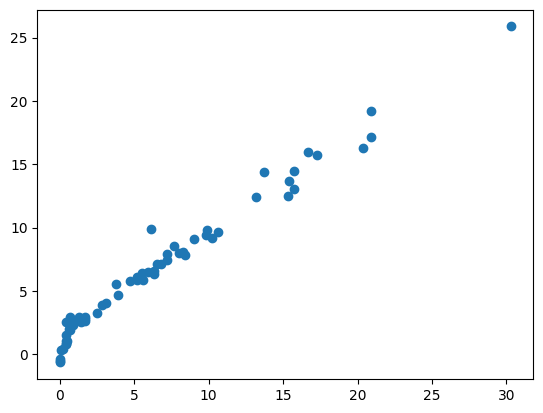

In [66]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print("Performance:",score)
plt.scatter(y_test,y_pred)